In [29]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import iris
import iris.iterate
import iris.coords
import iris.plot as iplt
import gsw

In [30]:
# load ROMS avg output
for mm  in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    ds = xr.open_dataset('/Volumes/LaCie_1.5Tb/WAOM_runs/waom10extend_shflim_S_0.25Q/output_21yr/ocean_avg_00' + mm + '.nc')
    print(ds.variables["temp"].shape)
    temp_tmp = np.nanmean(ds.variables["temp"], axis=0)
    salt_tmp = np.nanmean(ds.variables["salt"], axis=0)
    shflux_tmp = np.nanmean(ds.variables["shflux"], axis=0)
    ssflux_tmp = np.nanmean(ds.variables["ssflux"], axis=0)
    
    ds = ds.set_coords(['Cs_r', 'Cs_w', 'hc', 'h', 'Vtransform'])
    if ds.Vtransform == 1:
        Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
        z_rho_tmp = Zo_rho + ds.zeta * (1 + Zo_rho/ds.h)
        print("Vtransform=1")
    elif ds.Vtransform == 2:
        Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
        z_rho_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_rho
        print("Vtransform=2")
        Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
        z_w_tmp = ds.zeta + (ds.zeta + ds.h) * Zo_w
        
    z_rho_avg = np.nanmean(z_rho_tmp, axis=0)
    z_w_avg = np.nanmean(z_w_tmp,axis=0)
    
    # concatanate monthly avgs into a yearly variable
    if mm == '01':
        temp = temp_tmp
        salt = salt_tmp
        shflux = shflux_tmp
        ssflux = ssflux_tmp
        z_rho = z_rho_avg
        z_w = z_w_avg
    elif mm == '02':
        temp = np.stack((temp,temp_tmp), axis=0)
        salt = np.stack((salt,salt_tmp), axis=0)
        shflux = np.stack((shflux,shflux_tmp), axis=0)
        ssflux = np.stack((ssflux,ssflux_tmp), axis=0)
        z_rho = np.stack((z_rho,z_rho_avg), axis=0)
        z_w = np.stack((z_w,z_w_avg), axis=0)
    else:
        temp_tmp_4thdim = np.expand_dims(temp_tmp, axis=0)
        temp = np.concatenate((temp,temp_tmp_4thdim), axis=0)
        salt_tmp_4thdim = np.expand_dims(salt_tmp, axis=0)
        salt = np.concatenate((salt,salt_tmp_4thdim), axis=0)
        shflux_tmp_4thdim = np.expand_dims(shflux_tmp, axis=0)
        shflux = np.concatenate((shflux,shflux_tmp_4thdim), axis=0)    
        ssflux_tmp_4thdim = np.expand_dims(ssflux_tmp, axis=0)
        ssflux = np.concatenate((ssflux,ssflux_tmp_4thdim), axis=0)    
        z_rho_tmp_4thdim = np.expand_dims(z_rho_avg, axis=0)
        z_rho = np.concatenate((z_rho,z_rho_tmp_4thdim), axis=0) 
        z_w_tmp_4thdim = np.expand_dims(z_w_avg, axis=0)
        z_w = np.concatenate((z_w,z_w_tmp_4thdim), axis=0) 
#ds.coords['flux'] = flux#.transpose() # put flux into ds dataset

    ds.close()
sigma_t_sfc = gsw.rho(salt[:,-1,:,:],temp[:,-1,:,:],0) - 1000

(7, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


(6, 31, 560, 630)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


Vtransform=2


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice


In [31]:
# calculate dz following:
dz = np.empty((12,560,630,31))
dz_inv = np.empty((12,560,630,31))


for tt in np.arange(0,12):
    z_w_sorted = -1*z_w[tt,:,:,::-1]
    print(z_w_sorted.shape)
    dz_inv[tt,:,:,:] = np.diff(z_w_sorted,axis=2)
    dz[tt,:,:,:] = dz_inv[tt,:,:,::-1]

(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)
(560, 630, 32)


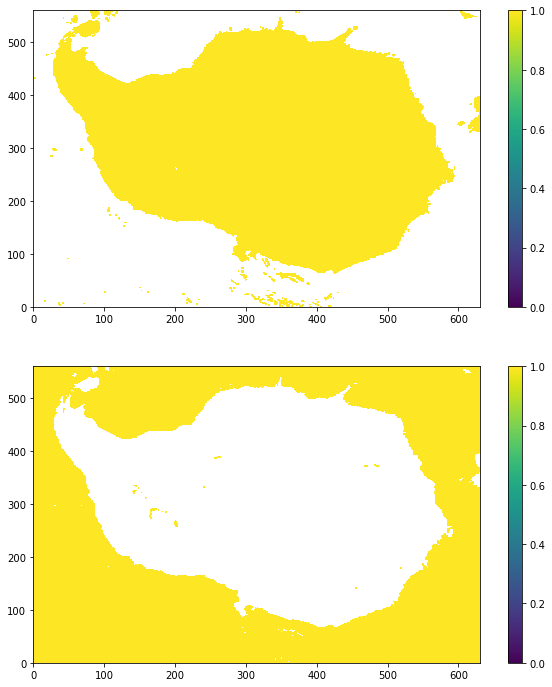

In [32]:
dg = xr.open_dataset("/Volumes/LaCie_1.5Tb/WAOM_runs/waom10_frc/waom10extend_grd.nc")

lat_rho = dg.variables["lat_rho"]
lon_rho = dg.variables["lon_rho"]
pm = dg.variables["pm"]
pn = dg.variables["pn"]

ds.coords['lat_rho']=lat_rho.transpose() # put lat_rho into ds dataset
ds.coords['lon_rho']=lon_rho.transpose() # put lon_rho into ds dataset

# shelf/open-ocean masks:
mask_shelf = np.empty((dg.h.shape))
mask_open = np.empty((dg.h.shape))

open_ind=ds.h.where(dg.h > 2000)
shelf_ind=ds.h.where(dg.h <= 2000)
#print(open_ind)

mask_shelf = np.divide(shelf_ind,shelf_ind)
mask_open = np.divide(open_ind,open_ind)

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(211)#, projection=proj)
cy=plt.pcolor(mask_shelf)#, transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(0.,1.)
ax2 = fig.add_subplot(212)#, projection=proj)
cy=plt.pcolor(mask_open)#, transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(0.,1.)

In [33]:
dx = xr.open_dataset('/Volumes/LaCie_1.5Tb/WAOM_runs/waom10extend_shflim_S_0.25Q/output_21yr/MLD_vint_vars_for_WMT.nc')
print(dx.variables["sfc_mld"].shape)
sfc_mld = dx.variables["sfc_mld"]
# - variables across ML base
temp_avg_mld = dx.variables["temp_avg_mld"]
salt_avg_mld = dx.variables["salt_avg_mld"]

# - variables integrated throughout the ML; multiply by -1 b/c dz is negative.
temp_vdia_diff_mld_vint = -dx.variables["temp_vdia_diff_mld_vint"]
salt_vdia_diff_mld_vint = -dx.variables["salt_vdia_diff_mld_vint"]
temp_hdia_diff_mld_vint = -dx.variables["temp_hdia_diff_mld_vint"]
salt_hdia_diff_mld_vint = -dx.variables["salt_hdia_diff_mld_vint"]
temp_vdia_adv_mld_vint = -dx.variables["temp_vdia_adv_mld_vint"]
salt_vdia_adv_mld_vint = -dx.variables["salt_vdia_adv_mld_vint"]
temp_hdia_adv_mld_vint = -dx.variables["temp_hdia_adv_mld_vint"]
salt_hdia_adv_mld_vint = -dx.variables["salt_hdia_adv_mld_vint"]
temp_tend_mld_vint = -dx.variables["temp_tend_avg_mld_vint"]
salt_tend_mld_vint = -dx.variables["salt_tend_avg_mld_vint"]

sigma_t = gsw.rho(salt_avg_mld,temp_avg_mld,0) - 1000

dx.close()

print(temp_vdia_diff_mld_vint.shape)

(12, 560, 630)
(12, 560, 630)


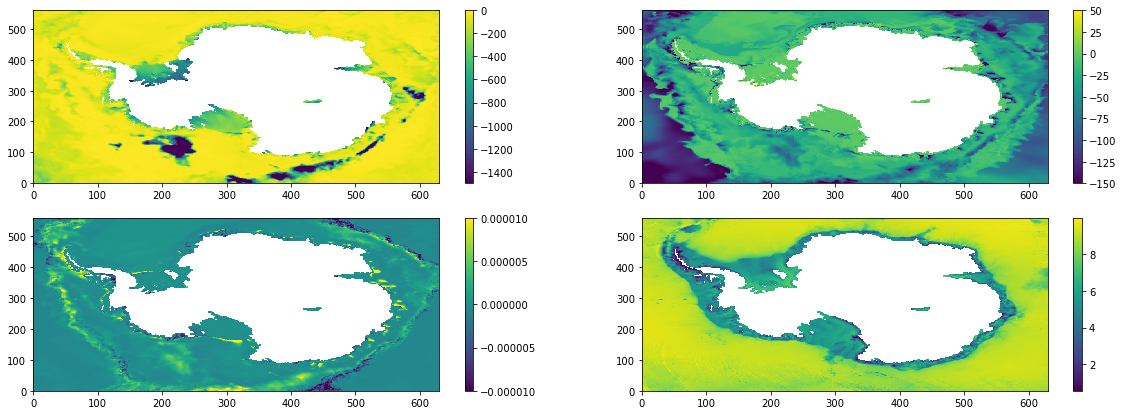

In [34]:
### print(sfc_mld.shape)

fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(221)#, projection=proj)
cy=plt.pcolor(sfc_mld[6,:,:])#, transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(-1500.,0.)
ax2 = fig.add_subplot(222)
cy=plt.pcolor(shflux[6,:,:])
plt.colorbar(cy)
plt.clim(-150.,50.)
ax3 = fig.add_subplot(223)
cy=plt.pcolor(ssflux[6,:,:])
plt.colorbar(cy)
plt.clim(-0.00001,0.00001)
ax4 = fig.add_subplot(224)
cy=plt.pcolor(dz[6,:,:,-1])
plt.colorbar(cy)
#plt.clim(-0.00001,0.00001)


In [35]:
# calculate the LHS term in Pellichero et al (2018):
# ps: Diffusion (R_s, R_t) terms already include the sfc fluxes

# heat (eqn 5)
rho0 = 1000
Cp = 3985

ssflux_msk = np.empty(ssflux.shape)
shflux_msk = np.empty(shflux.shape)
salt_hdia_diff_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
salt_vdia_diff_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
temp_hdia_diff_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
temp_vdia_diff_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
salt_hdia_adv_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
salt_vdia_adv_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
temp_hdia_adv_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
temp_vdia_adv_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
salt_tend_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)
temp_tend_mld_vint_msk = np.empty(salt_hdia_diff_mld_vint.shape)

for mm in np.arange(0,12):
    ssflux_msk[mm,:,:] = ssflux[mm,:,:]*mask_open 
    shflux_msk[mm,:,:] = shflux[mm,:,:]*mask_open 
    salt_hdia_diff_mld_vint_msk[mm,:,:] = salt_hdia_diff_mld_vint[mm,:,:]*mask_open
    salt_vdia_diff_mld_vint_msk[mm,:,:] = salt_vdia_diff_mld_vint[mm,:,:]*mask_open
    temp_hdia_diff_mld_vint_msk[mm,:,:] = temp_hdia_diff_mld_vint[mm,:,:]*mask_open
    temp_vdia_diff_mld_vint_msk[mm,:,:] = temp_vdia_diff_mld_vint[mm,:,:]*mask_open
    salt_hdia_adv_mld_vint_msk[mm,:,:] = salt_hdia_adv_mld_vint[mm,:,:]*mask_open
    salt_vdia_adv_mld_vint_msk[mm,:,:] = salt_vdia_adv_mld_vint[mm,:,:]*mask_open
    temp_hdia_adv_mld_vint_msk[mm,:,:] = temp_hdia_adv_mld_vint[mm,:,:]*mask_open
    temp_vdia_adv_mld_vint_msk[mm,:,:] = temp_vdia_adv_mld_vint[mm,:,:]*mask_open
    salt_tend_mld_vint_msk[mm,:,:] = salt_tend_mld_vint[mm,:,:]*mask_open
    temp_tend_mld_vint_msk[mm,:,:] = temp_tend_mld_vint[mm,:,:]*mask_open
    
del ssflux, shflux
del salt_hdia_diff_mld_vint, salt_vdia_diff_mld_vint, temp_hdia_diff_mld_vint, temp_vdia_diff_mld_vint
del salt_hdia_adv_mld_vint, salt_vdia_adv_mld_vint, temp_hdia_adv_mld_vint, temp_vdia_adv_mld_vint
del salt_tend_mld_vint, temp_tend_mld_vint

# same but using diff_vint:
# salt (eqn 4)
R_s_vint = salt_hdia_diff_mld_vint_msk + salt_vdia_diff_mld_vint_msk
Rh_s_vint = salt_hdia_diff_mld_vint_msk
Rv_s_vint = salt_vdia_diff_mld_vint_msk

# heat (eqn 5)
R_t_vint = temp_hdia_diff_mld_vint_msk + temp_vdia_diff_mld_vint_msk
Rh_t_vint = temp_hdia_diff_mld_vint_msk
Rv_t_vint = temp_vdia_diff_mld_vint_msk
print(R_t_vint.shape)

# calculate individual terms and RHS:
salt_sfc = np.divide(salt[:,-1,:,:]*ssflux_msk, -dz[:,:,:,-1])
temp_sfc = np.divide(shflux_msk, rho0*Cp*-dz[:,:,:,-1])

# ML budget equation: 
# salt:
# salt_sfc - R_s = -salt_tend_mld + salt_hdia_adv_mld + salt_vdia_adv_mld

# temp:
# temp_sfc - R_t = -temp_tend_mld + temp_hdia_adv_mld + temp_vdia_adv_mld

salt_adv_mld_vint = salt_hdia_adv_mld_vint_msk + salt_vdia_adv_mld_vint_msk
temp_adv_mld_vint = temp_hdia_adv_mld_vint_msk + temp_vdia_adv_mld_vint_msk

salt_hadv_mld_vint = salt_hdia_adv_mld_vint_msk
temp_hadv_mld_vint = temp_hdia_adv_mld_vint_msk

salt_vadv_mld_vint = salt_vdia_adv_mld_vint_msk
temp_vadv_mld_vint = temp_vdia_adv_mld_vint_msk


(12, 560, 630)


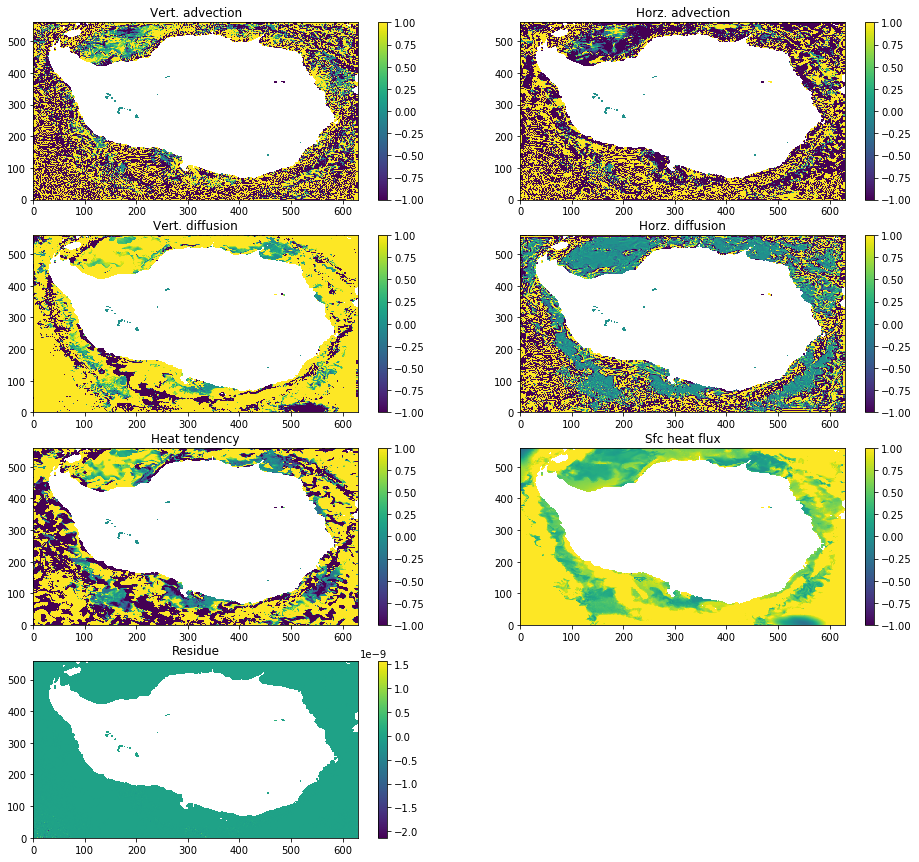

In [36]:
mm=7

fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(421)
plt.title('Vert. advection')
cy=plt.pcolor(temp_vdia_adv_mld_vint_msk[mm,:,:]*1e6)
plt.colorbar(cy)
plt.clim(-1,1.)
ax2 = fig.add_subplot(422)
plt.title('Horz. advection')
cy=plt.pcolor(temp_hdia_adv_mld_vint_msk[mm,:,:]*1e6)
plt.colorbar(cy)
plt.clim(-1,1.)
ax3 = fig.add_subplot(423)
plt.title('Vert. diffusion')
cy=plt.pcolor(temp_vdia_diff_mld_vint_msk[mm,:,:]*1e6)
plt.colorbar(cy)
plt.clim(-1,1.)
ax4 = fig.add_subplot(424)
plt.title('Horz. diffusion')
cy=plt.pcolor(temp_hdia_diff_mld_vint_msk[mm,:,:]*1e6)
plt.colorbar(cy)
plt.clim(-1,1.)
ax5 = fig.add_subplot(425)
plt.title('Heat tendency')
cy=plt.pcolor(temp_tend_mld_vint_msk[mm,:,:]*1e6)
plt.colorbar(cy)
plt.clim(-1,1.)
ax6 = fig.add_subplot(426)
plt.title('Sfc heat flux')
cy=plt.pcolor(temp_sfc[mm,:,:]*1e6)
plt.colorbar(cy)
plt.clim(-1,1.)
# residue
res = temp_tend_mld_vint_msk[mm,:,:] - (temp_vdia_adv_mld_vint_msk[mm,:,:]+temp_hdia_adv_mld_vint_msk[mm,:,:]+temp_vdia_diff_mld_vint_msk[mm,:,:]+temp_hdia_diff_mld_vint_msk[mm,:,:])
ax7 = fig.add_subplot(427)
plt.title('Residue')
cy=plt.pcolor(res)
plt.colorbar(cy)
#plt.clim(-1,1.)

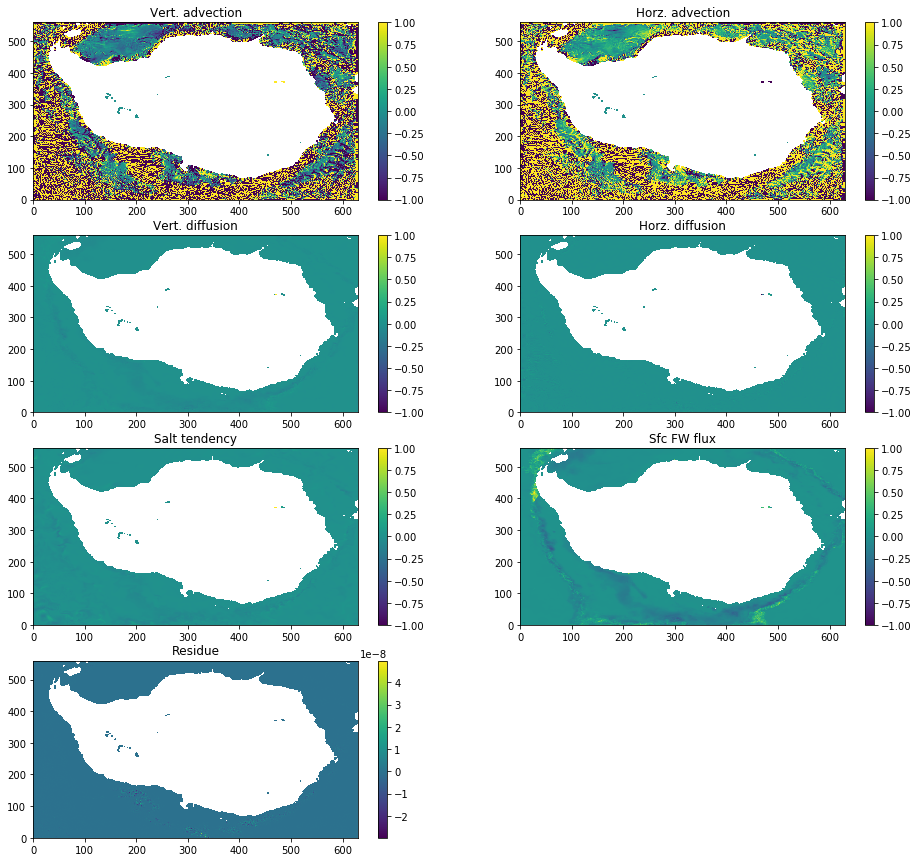

In [37]:
fig = plt.figure(figsize=(16,15))
ax1 = fig.add_subplot(421)
plt.title('Vert. advection')
cy=plt.pcolor(salt_vdia_adv_mld_vint_msk[mm,:,:]*1e4)
plt.colorbar(cy)
plt.clim(-1,1.)
ax2 = fig.add_subplot(422)
plt.title('Horz. advection')
cy=plt.pcolor(salt_hdia_adv_mld_vint_msk[mm,:,:]*1e4)
plt.colorbar(cy)
plt.clim(-1,1.)
ax3 = fig.add_subplot(423)
plt.title('Vert. diffusion')
cy=plt.pcolor(salt_vdia_diff_mld_vint_msk[mm,:,:]*1e4)
plt.colorbar(cy)
plt.clim(-1,1.)
ax4 = fig.add_subplot(424)
plt.title('Horz. diffusion')
cy=plt.pcolor(salt_hdia_diff_mld_vint_msk[mm,:,:]*1e4)
plt.colorbar(cy)
plt.clim(-1,1.)
ax5 = fig.add_subplot(425)
plt.title('Salt tendency')
cy=plt.pcolor(salt_tend_mld_vint_msk[mm,:,:]*1e4)
plt.colorbar(cy)
plt.clim(-1,1.)
ax6 = fig.add_subplot(426)
plt.title('Sfc FW flux')
cy=plt.pcolor(salt_sfc[mm,:,:]*1e4)
plt.colorbar(cy)
plt.clim(-1,1.)
# residue
res = salt_tend_mld_vint_msk[mm,:,:] - (salt_vdia_adv_mld_vint_msk[mm,:,:]+salt_hdia_adv_mld_vint_msk[mm,:,:]+salt_vdia_diff_mld_vint_msk[mm,:,:]+salt_hdia_diff_mld_vint_msk[mm,:,:])
ax7 = fig.add_subplot(427)
plt.title('Residue')
cy=plt.pcolor(res)
plt.colorbar(cy)
#plt.clim(-1,1.)

In [38]:
# calculate Annual-mean transformation rate (F, expressed in m3.s-1)

# rho grid for binning:
#rho_grid=np.arange(35.5,37.4,0.1) # for sigma-2
rho_grid=np.arange(24.4,29.1,0.1) # for sigma-0
len_rho_grid=len(rho_grid)

dx = np.divide(1,pm)
dy = np.divide(1,pn)
dt = 86400*30/12 #why divide by 12?

# rho grid for binning:
Fs_rate_adv_vint = np.empty(salt_adv_mld_vint.shape)
Fh_rate_adv_vint = np.empty(salt_adv_mld_vint.shape)
Fs_rate_diff_vint = np.empty(salt_adv_mld_vint.shape)
Fh_rate_diff_vint = np.empty(salt_adv_mld_vint.shape)
Fs_rate_net_vint = np.empty(salt_adv_mld_vint.shape)
Fh_rate_net_vint = np.empty(salt_adv_mld_vint.shape)
Fs_rate_sfc = np.empty(salt_adv_mld_vint.shape)
Fh_rate_sfc = np.empty(salt_adv_mld_vint.shape)

for mm in np.arange(0,12):   
    Fs_rate_adv_vint[mm,:] = dt*dx*dy*(1/9.81)*salt_adv_mld_vint[mm,:,:]
    Fh_rate_adv_vint[mm,:] = dt*dx*dy*(1/9.81)*temp_adv_mld_vint[mm,:,:]
    
    Fs_rate_diff_vint[mm,:] = dt*dx*dy*(1/9.81)*R_s_vint[mm,:,:]
    Fh_rate_diff_vint[mm,:] = dt*dx*dy*(1/9.81)*R_t_vint[mm,:,:]
    
    Fs_rate_net_vint[mm,:] = dt*dx*dy*(1/9.81)*salt_tend_mld_vint_msk[mm,:,:]
    Fh_rate_net_vint[mm,:] = dt*dx*dy*(1/9.81)*temp_tend_mld_vint_msk[mm,:,:]
    
    Fs_rate_sfc[mm,:] = dt*dx*dy*(1/9.81)*salt_sfc[mm,:,:]
    Fh_rate_sfc[mm,:] = dt*dx*dy*(1/9.81)*temp_sfc[mm,:,:]
    
print(Fs_rate_net_vint.shape)



(12, 560, 630)


In [39]:
#  mask for density classes: total advection (vint)
Fs_rate_delta_adv_vint_mm = np.empty((12,len_rho_grid,560,630))
Fh_rate_delta_adv_vint_mm = np.empty((12,len_rho_grid,560,630))

for mm in np.arange(0,12):
    sigma_tmp = sigma_t[mm,:,:]
    
    print(mm)
    for irho in np.arange(0,len_rho_grid):
    
        #print(irho)
    
        Fs_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fs_rate_adv_vint[mm,:,:])
        Fh_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fh_rate_adv_vint[mm,:,:])

        if irho == 0:
            Fs_rate_delta = Fs_rate_tmp.copy()
            Fs_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = Fh_rate_tmp.copy()
            Fh_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
        elif irho == 1:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_delta = np.stack((Fs_rate_delta,Fs_rate_tmp), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = np.stack((Fh_rate_delta,Fh_rate_tmp), axis=0)
        else:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_extradim = np.expand_dims(Fs_rate_tmp, axis=0)
            Fs_rate_delta = np.concatenate((Fs_rate_delta,Fs_rate_extradim), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_extradim = np.expand_dims(Fh_rate_tmp, axis=0)
            Fh_rate_delta = np.concatenate((Fh_rate_delta,Fh_rate_extradim), axis=0)
        del Fs_rate_tmp, Fh_rate_tmp
        
    Fs_rate_delta_adv_vint_mm[mm,:] = Fs_rate_delta
    Fh_rate_delta_adv_vint_mm[mm,:] = Fh_rate_delta

    
print(Fs_rate_delta_adv_vint_mm.shape, Fh_rate_delta_adv_vint_mm.shape)

0
1
2
3
4
5
6
7
8
9
10
11
(12, 48, 560, 630) (12, 48, 560, 630)


In [40]:
#  mask for density classes: total diffusion (vint)
Fs_rate_delta_diff_vint_mm = np.empty((12,len_rho_grid,560,630))
Fh_rate_delta_diff_vint_mm = np.empty((12,len_rho_grid,560,630))

for mm in np.arange(0,12):
    sigma_tmp = sigma_t[mm,:,:]
    
    print(mm)
    for irho in np.arange(0,len_rho_grid):
    
        #print(irho)
    
        Fs_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fs_rate_diff_vint[mm,:,:])
        Fh_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fh_rate_diff_vint[mm,:,:])

        if irho == 0:
            Fs_rate_delta = Fs_rate_tmp.copy()
            Fs_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = Fh_rate_tmp.copy()
            Fh_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
        elif irho == 1:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_delta = np.stack((Fs_rate_delta,Fs_rate_tmp), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = np.stack((Fh_rate_delta,Fh_rate_tmp), axis=0)
        else:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_extradim = np.expand_dims(Fs_rate_tmp, axis=0)
            Fs_rate_delta = np.concatenate((Fs_rate_delta,Fs_rate_extradim), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_extradim = np.expand_dims(Fh_rate_tmp, axis=0)
            Fh_rate_delta = np.concatenate((Fh_rate_delta,Fh_rate_extradim), axis=0)
        del Fs_rate_tmp, Fh_rate_tmp
        
    Fs_rate_delta_diff_vint_mm[mm,:] = Fs_rate_delta
    Fh_rate_delta_diff_vint_mm[mm,:] = Fh_rate_delta

    
print(Fs_rate_delta_diff_vint_mm.shape, Fh_rate_delta_diff_vint_mm.shape)

0
1
2
3
4
5
6
7
8
9
10
11
(12, 48, 560, 630) (12, 48, 560, 630)


In [41]:
#  mask for density classes: net tendency (vint)
Fs_rate_delta_net_vint_mm = np.empty((12,len_rho_grid,560,630))
Fh_rate_delta_net_vint_mm = np.empty((12,len_rho_grid,560,630))

for mm in np.arange(0,12):
    sigma_tmp = sigma_t[mm,:,:]
    
    print(mm)
    for irho in np.arange(0,len_rho_grid):
    
        #print(irho)
    
        Fs_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fs_rate_net_vint[mm,:,:])
        Fh_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fh_rate_net_vint[mm,:,:])

        if irho == 0:
            Fs_rate_delta = Fs_rate_tmp.copy()
            Fs_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = Fh_rate_tmp.copy()
            Fh_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
        elif irho == 1:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_delta = np.stack((Fs_rate_delta,Fs_rate_tmp), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = np.stack((Fh_rate_delta,Fh_rate_tmp), axis=0)
        else:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_extradim = np.expand_dims(Fs_rate_tmp, axis=0)
            Fs_rate_delta = np.concatenate((Fs_rate_delta,Fs_rate_extradim), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_extradim = np.expand_dims(Fh_rate_tmp, axis=0)
            Fh_rate_delta = np.concatenate((Fh_rate_delta,Fh_rate_extradim), axis=0)
        del Fs_rate_tmp, Fh_rate_tmp
        
    Fs_rate_delta_net_vint_mm[mm,:] = Fs_rate_delta
    Fh_rate_delta_net_vint_mm[mm,:] = Fh_rate_delta

    
print(Fs_rate_delta_net_vint_mm.shape, Fh_rate_delta_net_vint_mm.shape)

0
1
2
3
4
5
6
7
8
9
10
11
(12, 48, 560, 630) (12, 48, 560, 630)


In [42]:
#  mask for density classes: surface fluxes
Fs_rate_delta_sfc_mm = np.empty((12,len_rho_grid,560,630))
Fh_rate_delta_sfc_mm = np.empty((12,len_rho_grid,560,630))

for mm in np.arange(0,12):
    sigma_tmp = sigma_t_sfc[mm,:,:]
    
    print(mm)
    for irho in np.arange(0,len_rho_grid):
    
        #print(irho)
    
        Fs_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fs_rate_sfc[mm,:,:])
        Fh_rate_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2))), Fh_rate_sfc[mm,:,:])

        if irho == 0:
            Fs_rate_delta = Fs_rate_tmp.copy()
            Fs_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = Fh_rate_tmp.copy()
            Fh_rate_delta[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
        elif irho == 1:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_delta = np.stack((Fs_rate_delta,Fs_rate_tmp), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_delta = np.stack((Fh_rate_delta,Fh_rate_tmp), axis=0)
        else:
            Fs_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fs_rate_extradim = np.expand_dims(Fs_rate_tmp, axis=0)
            Fs_rate_delta = np.concatenate((Fs_rate_delta,Fs_rate_extradim), axis=0)
            Fh_rate_tmp[np.logical_or(sigma_tmp <= (rho_grid[irho]-(0.1/2)),sigma_tmp > (rho_grid[irho]+(0.1/2)))] = np.nan
            Fh_rate_extradim = np.expand_dims(Fh_rate_tmp, axis=0)
            Fh_rate_delta = np.concatenate((Fh_rate_delta,Fh_rate_extradim), axis=0)
        del Fs_rate_tmp, Fh_rate_tmp
        
    Fs_rate_delta_sfc_mm[mm,:] = Fs_rate_delta
    Fh_rate_delta_sfc_mm[mm,:] = Fh_rate_delta

    
print(Fs_rate_delta_sfc_mm.shape, Fh_rate_delta_sfc_mm.shape)

0
1
2
3
4
5
6
7
8
9
10
11
(12, 48, 560, 630) (12, 48, 560, 630)


0 24.349999999999998 24.45 (50, 50)
1 24.45 24.55 (50, 50)
2 24.55 24.650000000000002 (50, 50)
3 24.650000000000002 24.750000000000004 (50, 50)
4 24.750000000000004 24.850000000000005 (50, 50)
5 24.850000000000005 24.950000000000006 (50, 50)
6 24.950000000000006 25.050000000000008 (50, 50)
7 25.050000000000008 25.15000000000001 (50, 50)
8 25.15000000000001 25.25000000000001 (50, 50)
9 25.25000000000001 25.350000000000012 (50, 50)
10 25.350000000000012 25.450000000000014 (50, 50)
11 25.450000000000014 25.550000000000015 (50, 50)
12 25.550000000000015 25.650000000000016 (50, 50)
13 25.650000000000016 25.750000000000018 (50, 50)
14 25.750000000000018 25.85000000000002 (50, 50)
15 25.85000000000002 25.95000000000002 (50, 50)
16 25.95000000000002 26.050000000000022 (50, 50)
17 26.050000000000022 26.150000000000023 (50, 50)
18 26.150000000000023 26.250000000000025 (50, 50)
19 26.250000000000025 26.350000000000026 (50, 50)
20 26.350000000000026 26.450000000000028 (50, 50)
21 26.45000000000002

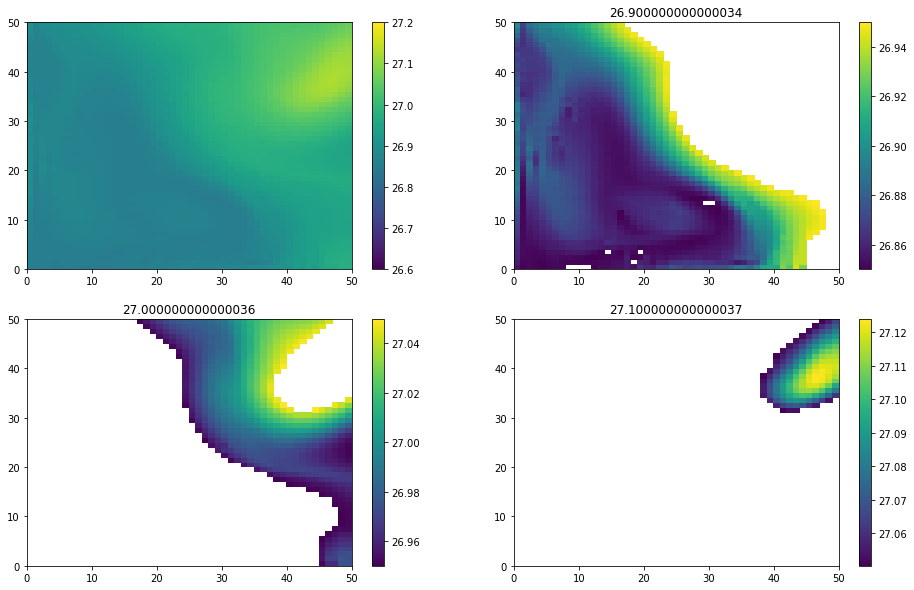

In [43]:
# development mask for density classes:
sigma_sept = sigma_t[8,0:50,0:50]

for irho in np.arange(0,len_rho_grid):
    print(irho, rho_grid[irho]-(0.1/2), rho_grid[irho]+(0.1/2), sigma_sept.shape)
    #print(irho, rho_grid[irho])
    
#    icritst_tmp = ma.masked_where(sigma_sept >= rho_grid[irho], sigma_sept)
    icritst_tmp = ma.masked_where(np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2))), sigma_sept)

    #print(icritst_tmp.shape)
    
    
    if irho == 0:
        icritst = icritst_tmp.copy()
        #icritst[sigma_sept >= rho_grid[irho]] = np.nan
        icritst[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
        #print(icritst.shape)
    elif irho == 1:
        #icritst_tmp[sigma_sept >= rho_grid[irho]] = np.nan
        icritst_tmp[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
        icritst = np.stack((icritst,icritst_tmp), axis=0)
        #print(icritst.shape)
    else:
        icritst_tmp[np.logical_or(sigma_sept <= (rho_grid[irho]-(0.1/2)),sigma_sept > (rho_grid[irho]+(0.1/2)))] = np.nan
        icritst_extradim = np.expand_dims(icritst_tmp, axis=0)
        icritst = np.concatenate((icritst,icritst_extradim), axis=0)
        #print(icritst.shape)
    del icritst_tmp
    
print(icritst.shape)
    
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(221)
plt.title('')
cy=plt.pcolor(sigma_sept)
plt.colorbar(cy)
plt.clim(26.6,27.2)
ax2 = fig.add_subplot(222)
plt.title(str(rho_grid[25]))
cy=plt.pcolor(icritst[25,:,:])
plt.colorbar(cy)
#plt.clim(26.6,26.9)
ax3 = fig.add_subplot(223)
plt.title(str(rho_grid[26]))
cy=plt.pcolor(icritst[26,:,:])
plt.colorbar(cy)
#plt.clim(26.6,26.9)
ax3 = fig.add_subplot(224)
plt.title(str(rho_grid[27]))
cy=plt.pcolor(icritst[27,:,:])
plt.colorbar(cy)
#plt.clim(26.6,26.9)


In [44]:
# integrated over x, y directions:
Fs_rate_sfc_mm_int = np.empty((len(rho_grid),12))
Fh_rate_sfc_mm_int = np.empty((len(rho_grid),12))

Fs_rate_adv_vint_mm_int = np.empty((len(rho_grid),12))
Fh_rate_adv_vint_mm_int = np.empty((len(rho_grid),12))
Fs_rate_diff_vint_mm_int = np.empty((len(rho_grid),12))
Fh_rate_diff_vint_mm_int = np.empty((len(rho_grid),12))
Fs_rate_net_vint_mm_int = np.empty((len(rho_grid),12))
Fh_rate_net_vint_mm_int = np.empty((len(rho_grid),12))


for irho in np.arange(0,len(rho_grid)):   
    for mm in np.arange(0,12):
        
        Fs_rate_sfc_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_sfc_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Fh_rate_sfc_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_sfc_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1

        Fs_rate_adv_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_adv_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Fh_rate_adv_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_adv_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        
        Fs_rate_diff_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_diff_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Fh_rate_diff_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_diff_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        
        Fs_rate_net_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_net_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
        Fh_rate_net_vint_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_net_vint_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1


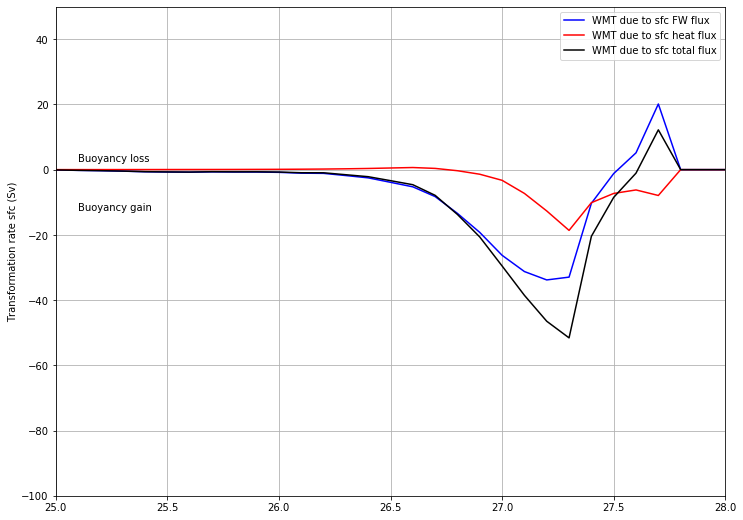

In [45]:
# figures
fig_path = '/Users/boeiradi/COLD_project/ROMS_runs/figs/WAOM10extend_shflim_S_0.25Q/WMT/'

# plot with bars
width=.023

# convert to rate per year:
Dt = 365*86400

# divide for Dt (sec in 1 year) and 10^6 to obtain rate in Sv year-1 

# SFC
Fs_sig_sfc_mm = -Fs_rate_sfc_mm_int/Dt/1e6 
Fh_sig_sfc_mm = -Fh_rate_sfc_mm_int/Dt/1e6 
F_sig_sfc_mm = Fs_sig_sfc_mm + Fh_sig_sfc_mm
# - calculate the anual average of the monthly ars:
Fs_sig_sfc =  np.nanmean(Fs_sig_sfc_mm, axis=1)
Fh_sig_sfc =  np.nanmean(Fh_sig_sfc_mm, axis=1)
F_sig_sfc = Fs_sig_sfc + Fh_sig_sfc


fig = plt.figure(figsize=(12,9))

ax1 = fig.add_subplot(111)
plt.title('')
cs=plt.plot(rho_grid,Fs_sig_sfc,'b',label='WMT due to sfc FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to sfc heat flux')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to sfc total flux')
plt.legend()
plt.ylabel('Transformation rate sfc (Sv)')
plt.xlim(25,28),plt.ylim(-100,50)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-12.5,'Buoyancy gain')

name_fig="waom10extend_shflim_S_0.25Q_WMT_sfc_fluxes_annual_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)


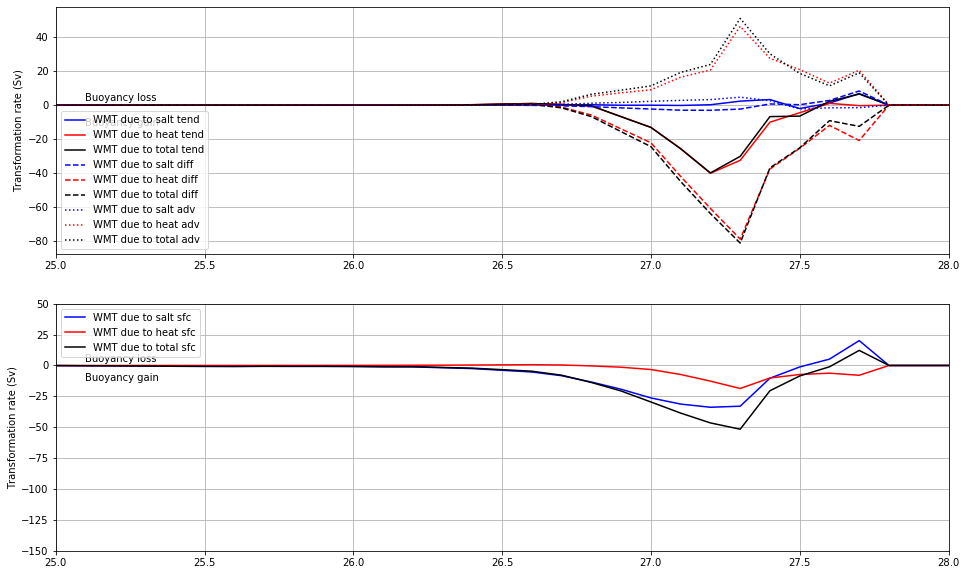

In [46]:
# ADV (vint)
Fs_sig_adv_vint_mm = -Fs_rate_adv_vint_mm_int/Dt/1e6 
Fh_sig_adv_vint_mm = -Fh_rate_adv_vint_mm_int/Dt/1e6 
F_sig_adv_vint_mm = Fs_sig_adv_vint_mm + Fh_sig_adv_vint_mm
# - calculate the anual average of the monthly ars:
Fs_sig_adv_vint =  np.nanmean(Fs_sig_adv_vint_mm, axis=1)
Fh_sig_adv_vint =  np.nanmean(Fh_sig_adv_vint_mm, axis=1)
F_sig_adv_vint = Fs_sig_adv_vint + Fh_sig_adv_vint

# DIFF
Fs_sig_diff_vint_mm = -Fs_rate_diff_vint_mm_int/Dt/1e6 
Fh_sig_diff_vint_mm = -Fh_rate_diff_vint_mm_int/Dt/1e6 
F_sig_diff_vint_mm = Fs_sig_diff_vint_mm + Fh_sig_diff_vint_mm
# - calculate the anual average of the monthly ars:
Fs_sig_diff_vint =  np.nanmean(Fs_sig_diff_vint_mm, axis=1)
Fh_sig_diff_vint =  np.nanmean(Fh_sig_diff_vint_mm, axis=1)
F_sig_diff_vint = Fs_sig_diff_vint + Fh_sig_diff_vint

# NET
Fs_sig_net_vint_mm = -Fs_rate_net_vint_mm_int/Dt/1e6 
Fh_sig_net_vint_mm = -Fh_rate_net_vint_mm_int/Dt/1e6 
F_sig_net_vint_mm = Fs_sig_net_vint_mm + Fh_sig_net_vint_mm
# - calculate the anual average of the monthly ars:
Fs_sig_net_vint =  np.nanmean(Fs_sig_net_vint_mm, axis=1)
Fh_sig_net_vint =  np.nanmean(Fh_sig_net_vint_mm, axis=1)
F_sig_net_vint = Fs_sig_net_vint + Fh_sig_net_vint

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.plot(rho_grid,Fs_sig_net_vint,'b',label='WMT due to salt tend')
ch=plt.plot(rho_grid,Fh_sig_net_vint,'r',label='WMT due to heat tend')
ct=plt.plot(rho_grid,F_sig_net_vint,'k',label='WMT due to total tend')
cs=plt.plot(rho_grid,Fs_sig_diff_vint,'--b',label='WMT due to salt diff')
ch=plt.plot(rho_grid,Fh_sig_diff_vint,'--r',label='WMT due to heat diff')
ct=plt.plot(rho_grid,F_sig_diff_vint,'--k',label='WMT due to total diff')
cs=plt.plot(rho_grid,Fs_sig_adv_vint,':b',label='WMT due to salt adv')
ch=plt.plot(rho_grid,Fh_sig_adv_vint,':r',label='WMT due to heat adv')
ct=plt.plot(rho_grid,F_sig_adv_vint,':k',label='WMT due to total adv')
plt.legend(loc='lower left')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28)#,plt.ylim(-200,1050)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-12.5,'Buoyancy gain')
ax2 = fig.add_subplot(212)
plt.title('')
cs=plt.plot(rho_grid,Fs_sig_sfc,'b',label='WMT due to salt sfc')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to heat sfc')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to total sfc')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,50)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-12.5,'Buoyancy gain')

name_fig="waom10extend_shflim_S_0.25Q_WMT_budget_vint_annual_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)

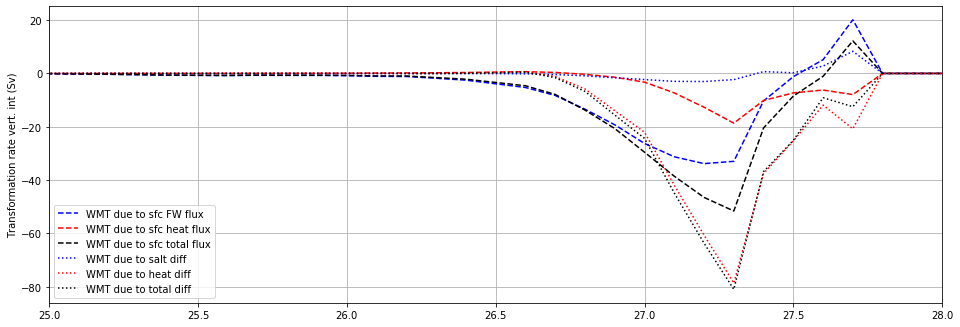

In [47]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.plot(rho_grid,Fs_sig_sfc,'--b',label='WMT due to sfc FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc,'--r',label='WMT due to sfc heat flux')
ct=plt.plot(rho_grid,F_sig_sfc,'--k',label='WMT due to sfc total flux')
#cs=plt.plot(rho_grid,Fs_sig_net_vint,'b',label='WMT due to salt tend')
#ch=plt.plot(rho_grid,Fh_sig_net_vint,'r',label='WMT due to heat tend')
#ct=plt.plot(rho_grid,F_sig_net_vint,'k',label='WMT due to total tend')
cs=plt.plot(rho_grid,Fs_sig_diff_vint,':b',label='WMT due to salt diff')
ch=plt.plot(rho_grid,Fh_sig_diff_vint,':r',label='WMT due to heat diff')
ct=plt.plot(rho_grid,F_sig_diff_vint,':k',label='WMT due to total diff')
plt.legend()
plt.ylabel('Transformation rate vert. int (Sv)')
plt.xlim(25,28)#,plt.ylim(-150,50)
plt.grid(True)
##plt.text(25.1,-12.5,'Buoyancy gain')

In [48]:
# calculate Water Mass Formation
# M(sigma) = -[F(sigma_2) - F(sigma_1)]; Pellichero et al (2018) eqn 3

    
total_form_vint = np.empty(len(rho_grid))
total_form_fwf_vint = np.empty(len(rho_grid))
total_form_hf_vint = np.empty(len(rho_grid))

for irho in np.arange(0,len(rho_grid)-1):
    if irho < (len(rho_grid)-1):
        total_form_vint_tmp = -(F_sig_sfc[irho+1] - F_sig_sfc[irho])
        total_form_fwf_vint_tmp = -(Fs_sig_sfc[irho+1] - Fs_sig_sfc[irho])
        total_form_hf_vint_tmp = -(Fh_sig_sfc[irho+1] - Fh_sig_sfc[irho])
    else:
        total_form_vint_tmp = F_sig_sfc[irho]
        total_form_fwf_vint_tmp = Fs_sig_sfc[irho]
        total_form_hf_vint_tmp = Fh_sig_sfc[irho]
        
    total_form_vint[irho] = total_form_vint_tmp
    total_form_fwf_vint[irho] = total_form_fwf_vint_tmp
    total_form_hf_vint[irho] = total_form_hf_vint_tmp

In [49]:
total_form_mm = np.empty((len(rho_grid),12))
total_form_fwf_mm = np.empty((len(rho_grid),12))
total_form_hf_mm = np.empty((len(rho_grid),12))

for irho in np.arange(0,len(rho_grid)-1):
    total_form_tmp_mm = np.empty(12)
    total_form_fwf_tmp_mm = np.empty(12)
    total_form_hf_tmp_mm = np.empty(12)
    
    for mm in np.arange(0,12):
        print(mm)
        if irho < (len(rho_grid)-1):
            total_form_tmp = -(F_sig_sfc_mm[irho+1,mm] - F_sig_sfc_mm[irho,mm])
            total_form_fwf_tmp = -(Fs_sig_sfc_mm[irho+1,mm] - Fs_sig_sfc_mm[irho,mm])
            total_form_hf_tmp = -(Fh_sig_sfc_mm[irho+1,mm] - Fh_sig_sfc_mm[irho,mm])
        else:
            total_form_tmp = F_sig_sfc_mm[irho,mm]
            total_form_fwf_tmp = Fs_sig_sfc_mm[irho,mm]
            total_form_hf_tmp = Fh_sig_sfc_mm[irho,mm]

        total_form_tmp_mm[mm] = total_form_tmp
        total_form_fwf_tmp_mm[mm] = total_form_fwf_tmp
        total_form_hf_tmp_mm[mm] = total_form_hf_tmp
        print(total_form_tmp_mm.shape, total_form_mm.shape)
        
    total_form_mm[irho,:] = total_form_tmp_mm
    total_form_fwf_mm[irho,:] = total_form_fwf_tmp_mm
    total_form_hf_mm[irho,:] = total_form_hf_tmp_mm

0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12

(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)
0
(12,) (48, 12)
1
(12,) (48, 12)
2
(12,) (48, 12)
3
(12,) (48, 12)
4
(12,) (48, 12)
5
(12,) (48, 12)
6
(12,) (48, 12)
7
(12,) (48, 12)
8
(12,) (48, 12)
9
(12,) (48, 12)
10
(12,) (48, 12)
11
(12,) (48, 12)


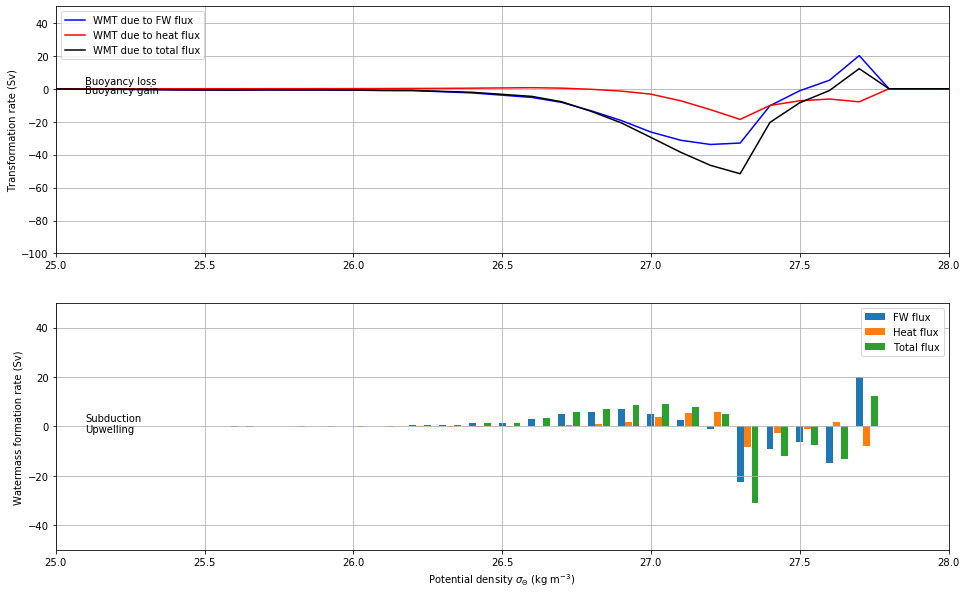

In [50]:
# same but using vert_int transformation
    
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.plot(rho_grid,Fs_sig_sfc,'b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to total flux')
plt.legend()
#plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-100,50)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-2.5,'Buoyancy gain')


#fig = plt.figure(figsize=(10,7))
ax2 = fig.add_subplot(212)
plt.title('')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_vint,width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_vint,width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_vint,width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-50,50)
plt.grid(True)
plt.text(25.1,2.2,'Subduction')
plt.text(25.1,-2.2,'Upwelling')

name_fig="waom10extend_shflim_S_0.25Q_WMT_WMF_vint_annual_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)

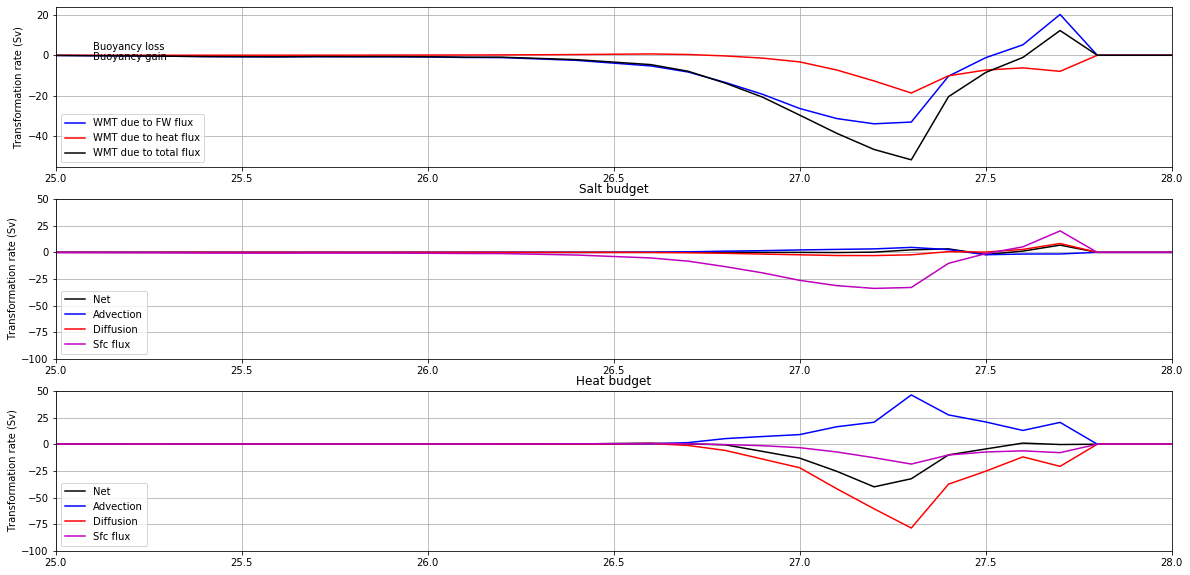

In [51]:
# figures decomposing components:
    
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(311)
plt.title('')
cs=plt.plot(rho_grid,Fs_sig_sfc,'b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc,'r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_sfc,'k',label='WMT due to total flux')
#cs=plt.plot(rho_grid,Fs_sig_net_vint,'--b',label='WMT due to FW flux')
#ch=plt.plot(rho_grid,Fh_sig_net_vint,'--r',label='WMT due to heat flux')
#ct=plt.plot(rho_grid,F_sig_net_vint,'--k',label='WMT due to total flux')
#cs=plt.plot(rho_grid,Fs_sig_rhs_alt_vint,'-ob',label='WMT due to FW flux')
#ch=plt.plot(rho_grid,Fh_sig_rhs_alt_vint,'-or',label='WMT due to heat flux')
#ct=plt.plot(rho_grid,F_sig_rhs_alt_vint,'-ok',label='WMT due to total flux')
plt.legend()
#plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28)#,plt.ylim(-800,800)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-2.5,'Buoyancy gain')

ax2 = fig.add_subplot(312)
plt.title('Salt budget')
c1=plt.plot(rho_grid,Fs_sig_net_vint,'-k',label='Net')
c2=plt.plot(rho_grid,Fs_sig_adv_vint,'-b',label='Advection')
c3=plt.plot(rho_grid,Fs_sig_diff_vint,'-r',label='Diffusion')
c4=plt.plot(rho_grid,Fs_sig_sfc,'-m',label='Sfc flux')
plt.legend()
#plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-100,50)
plt.grid(True)

ax3 = fig.add_subplot(313)
plt.title('Heat budget')
c1=plt.plot(rho_grid,Fh_sig_net_vint,'-k',label='Net')
c2=plt.plot(rho_grid,Fh_sig_adv_vint,'-b',label='Advection')
c3=plt.plot(rho_grid,Fh_sig_diff_vint,'-r',label='Diffusion')
c4=plt.plot(rho_grid,Fh_sig_sfc,'-m',label='Sfc flux')
plt.legend()
#plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-100,50)
plt.grid(True)

name_fig="waom10extend_shflim_S_0.25Q_WMT_budget_annual_vint_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)

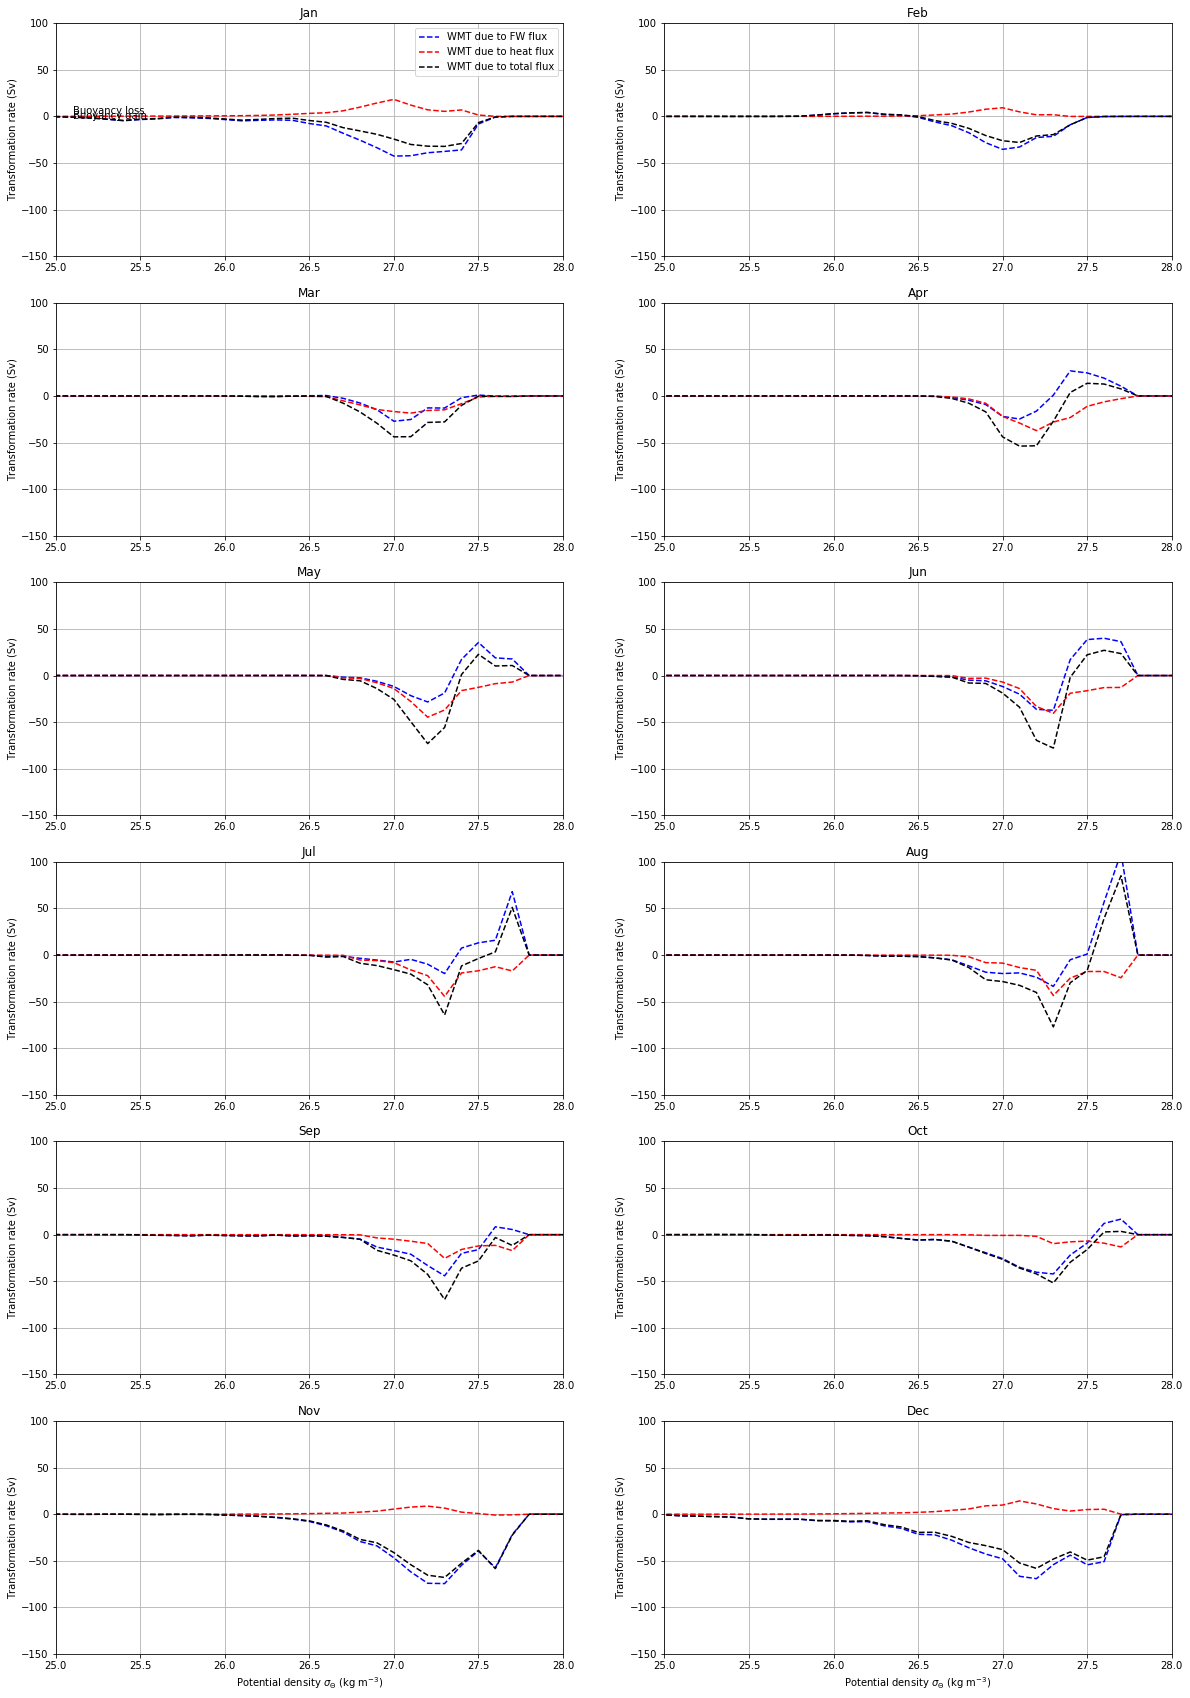

In [52]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,0],'--b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,0],'--r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,0],'--k',label='WMT due to total flux')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-2.5,'Buoyancy gain')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,1],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,1],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,1],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,2],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,2],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,2],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,3],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,3],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,3],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,4],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,4],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,4],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,5],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,5],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,5],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,6],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,6],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,6],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,7],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,7],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,7],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,8],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,8],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,8],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,9],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,9],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,9],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,10],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,10],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,10],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.plot(rho_grid,Fs_sig_sfc_mm[:,11],'--b')
ch=plt.plot(rho_grid,Fh_sig_sfc_mm[:,11],'--r')
ct=plt.plot(rho_grid,F_sig_sfc_mm[:,11],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMT_sfc_monthly_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)

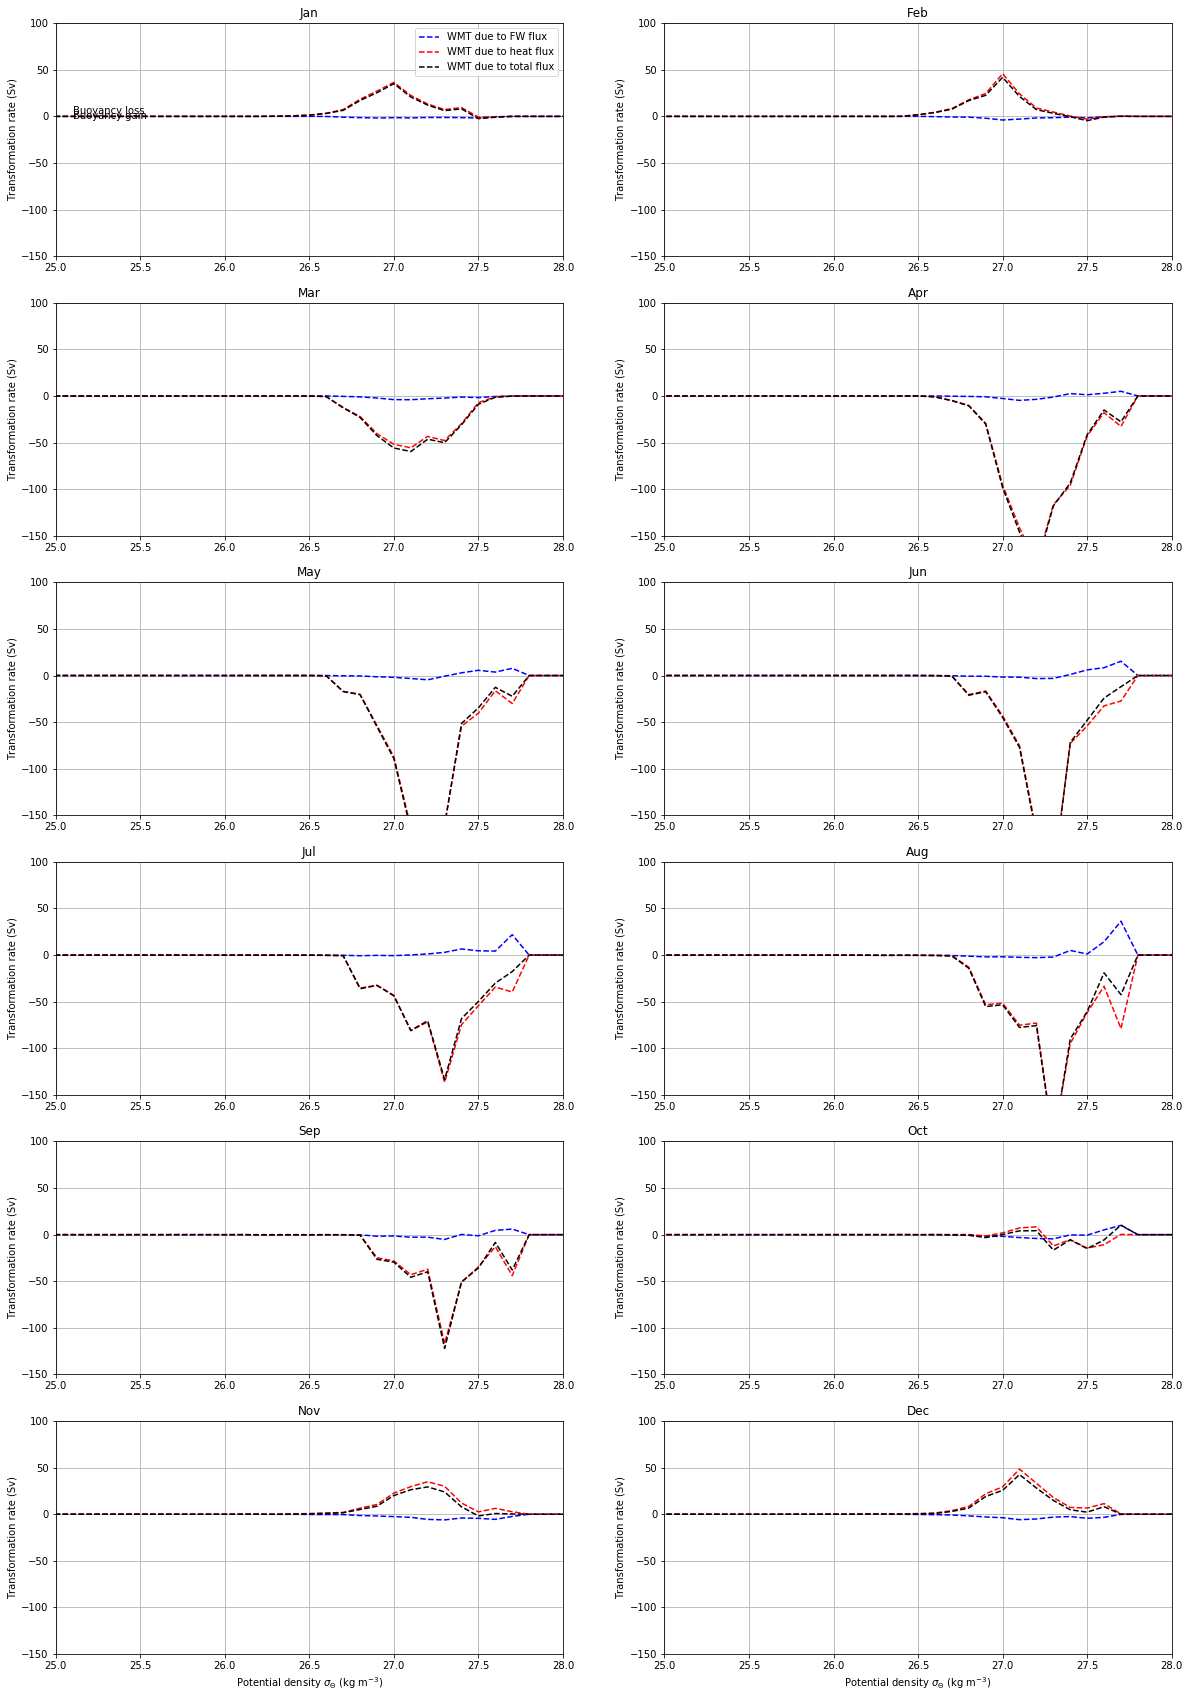

In [53]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,0],'--b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,0],'--r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,0],'--k',label='WMT due to total flux')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-2.5,'Buoyancy gain')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,1],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,1],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,1],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,2],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,2],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,2],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,3],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,3],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,3],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,4],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,4],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,4],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,5],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,5],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,5],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,6],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,6],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,6],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,7],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,7],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,7],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,8],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,8],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,8],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,9],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,9],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,9],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,10],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,10],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,10],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.plot(rho_grid,Fs_sig_diff_vint_mm[:,11],'--b')
ch=plt.plot(rho_grid,Fh_sig_diff_vint_mm[:,11],'--r')
ct=plt.plot(rho_grid,F_sig_diff_vint_mm[:,11],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMT_diff_vint_monthly_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)

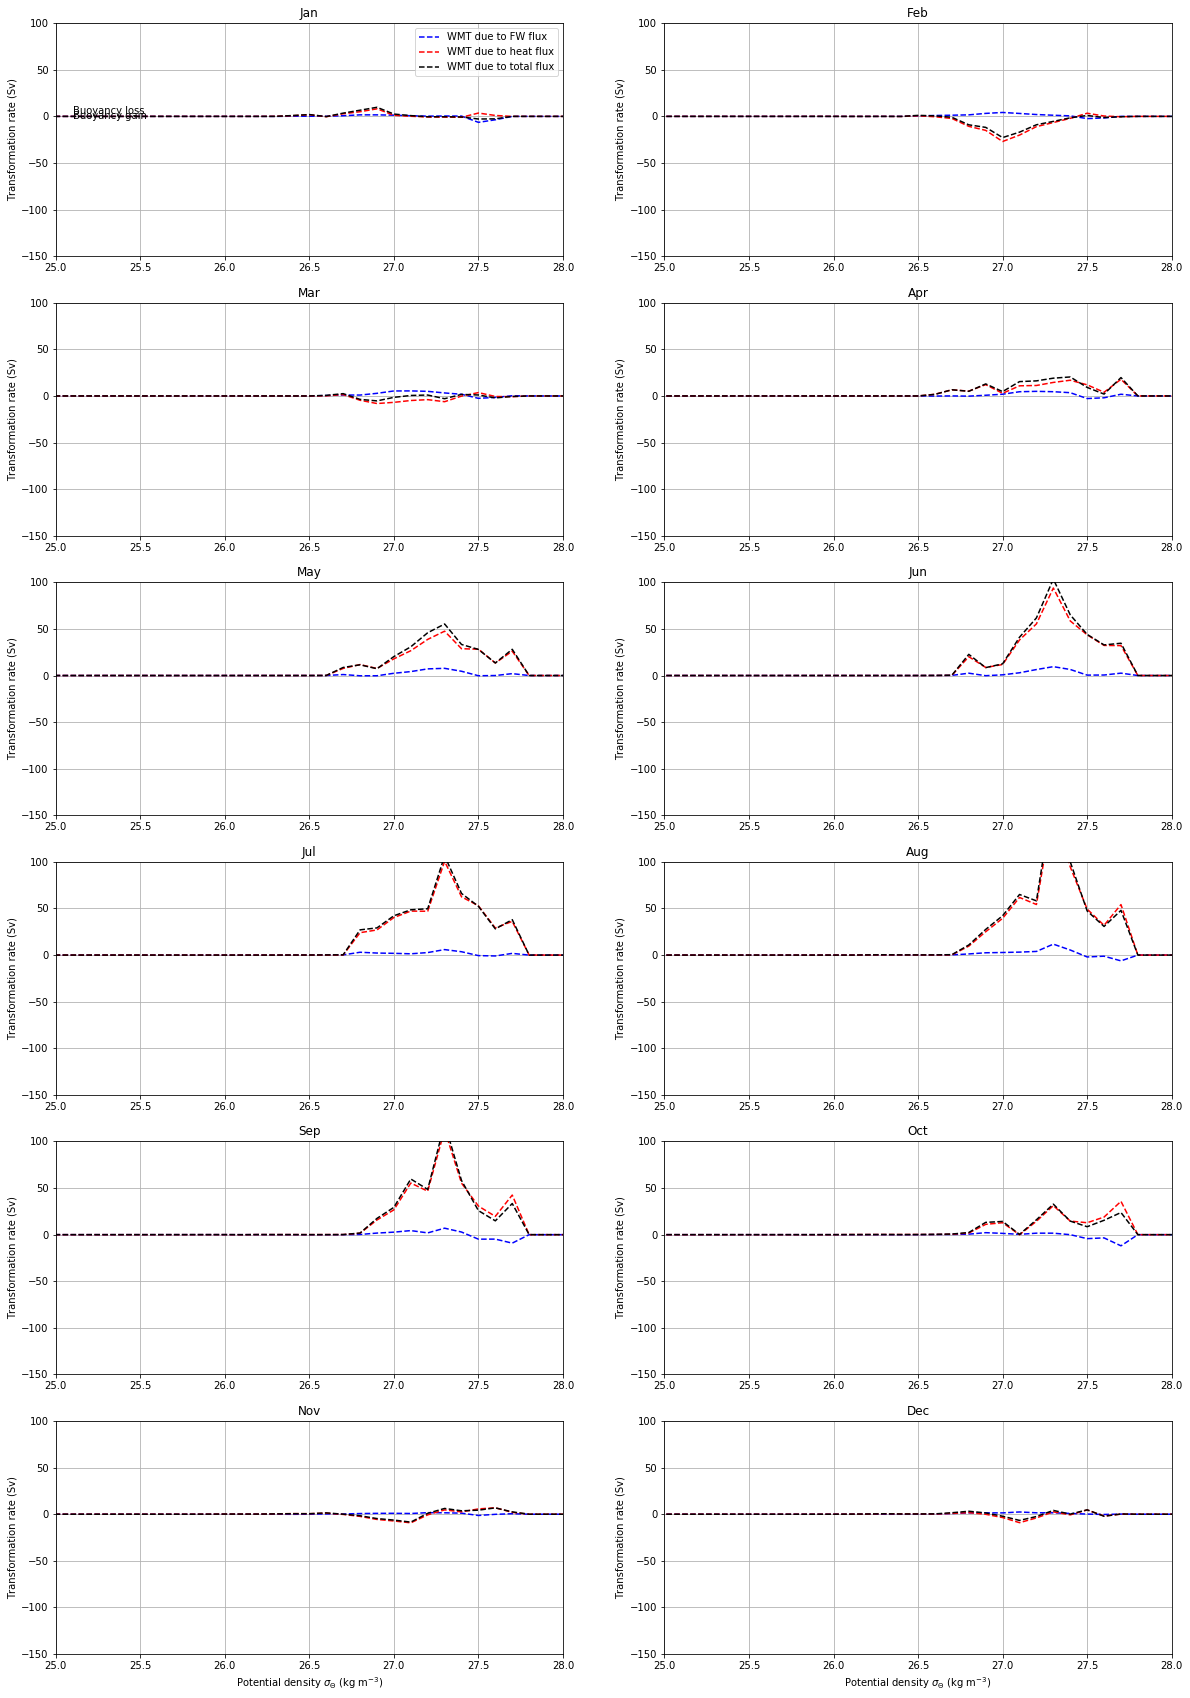

In [54]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,0],'--b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,0],'--r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,0],'--k',label='WMT due to total flux')
plt.legend()
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-2.5,'Buoyancy gain')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,1],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,1],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,1],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,2],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,2],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,2],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,3],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,3],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,3],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,4],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,4],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,4],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,5],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,5],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,5],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,6],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,6],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,6],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,7],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,7],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,7],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,8],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,8],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,8],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,9],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,9],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,9],'--k')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,10],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,10],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,10],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.plot(rho_grid,Fs_sig_adv_vint_mm[:,11],'--b')
ch=plt.plot(rho_grid,Fh_sig_adv_vint_mm[:,11],'--r')
ct=plt.plot(rho_grid,F_sig_adv_vint_mm[:,11],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation rate (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMT_adv_vint_monthly_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)

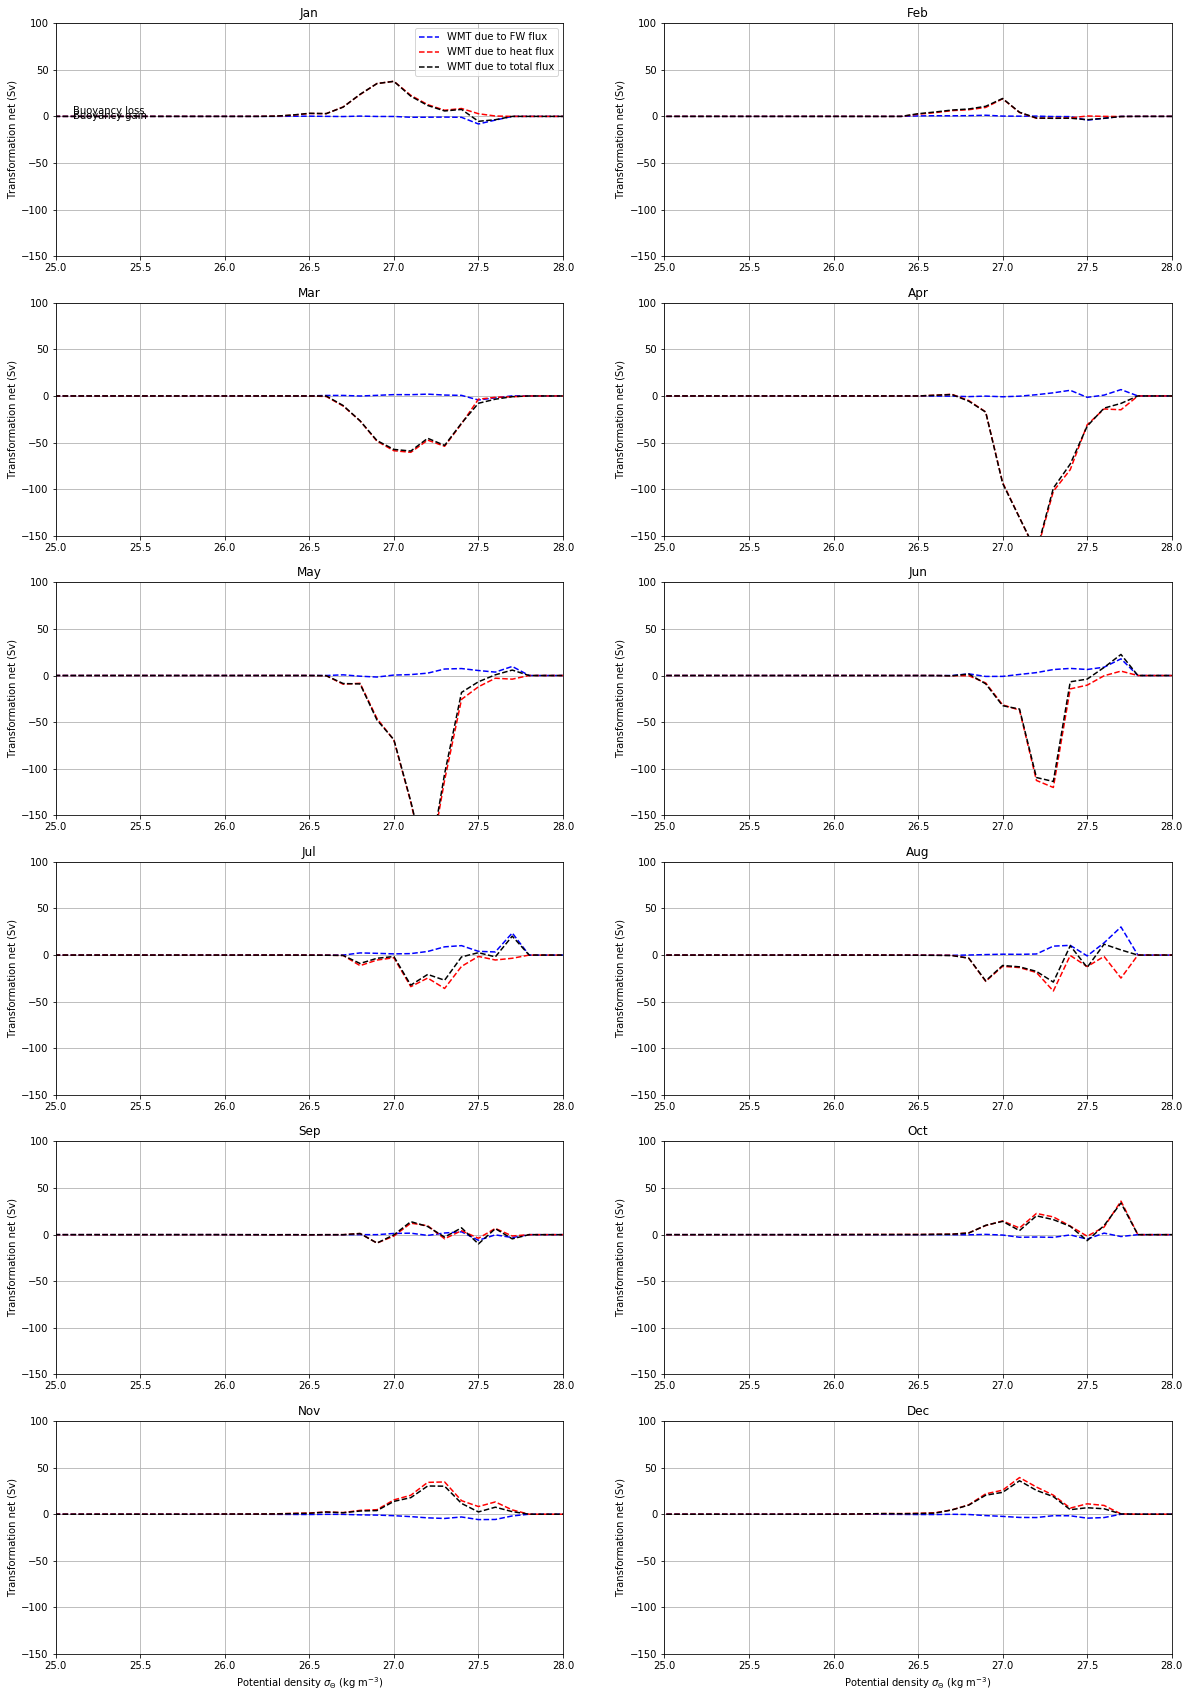

In [55]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,0],'--b',label='WMT due to FW flux')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,0],'--r',label='WMT due to heat flux')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,0],'--k',label='WMT due to total flux')
plt.legend()
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)
plt.text(25.1,2.5,'Buoyancy loss')
plt.text(25.1,-2.5,'Buoyancy gain')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,1],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,1],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,1],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,2],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,2],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,2],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,3],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,3],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,3],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,4],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,4],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,4],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,5],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,5],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,5],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,6],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,6],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,6],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,7],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,7],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,7],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,8],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,8],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,8],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,9],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,9],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,9],'--k')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,10],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,10],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,10],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.plot(rho_grid,Fs_sig_net_vint_mm[:,11],'--b')
ch=plt.plot(rho_grid,Fh_sig_net_vint_mm[:,11],'--r')
ct=plt.plot(rho_grid,F_sig_net_vint_mm[:,11],'--k')
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Transformation net (Sv)')
plt.xlim(25,28),plt.ylim(-150,100)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMT_net_vint_monthly_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)

NameError: name 'total_form_fwf' is not defined

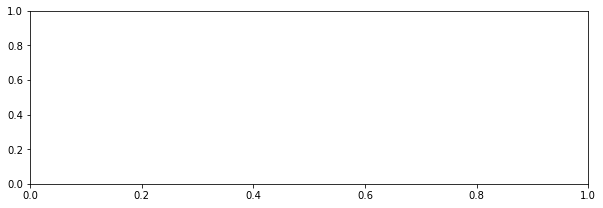

In [28]:
#rects1 = ax.bar(x - width/2, men_means, width, label='Men')

# plot with bars
width=.023

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
plt.title('')
cs=plt.bar(rho_grid + 0.0,total_form_fwf,width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf,width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form,width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)
plt.text(25.1,2.2,'Subduction')
plt.text(25.1,-2.2,'Upwelling')

name_fig="waom10extend_shflim_S_0.25Q_WMformation_ving_annual_yr21_open.png"
plt.savefig(fig_path + name_fig, dpi=300)

In [ ]:
fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(6,2,1)
plt.title('Jan')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,0],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,0],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,0],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)
plt.text(25.1,2.2,'Subduction')
plt.text(25.1,-2.2,'Upwelling')

ax2 = fig.add_subplot(6,2,2)
plt.title('Feb')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,1],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,1],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,1],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax3 = fig.add_subplot(6,2,3)
plt.title('Mar')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,2],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,2],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,2],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax4 = fig.add_subplot(6,2,4)
plt.title('Apr')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,3],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,3],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,3],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax5 = fig.add_subplot(6,2,5)
plt.title('May')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,4],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,4],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,4],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax6 = fig.add_subplot(6,2,6)
plt.title('Jun')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,5],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,5],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,5],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax7 = fig.add_subplot(6,2,7)
plt.title('Jul')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,6],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,6],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,6],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax8 = fig.add_subplot(6,2,8)
plt.title('Aug')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,7],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,7],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,7],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax9 = fig.add_subplot(6,2,9)
plt.title('Sep')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,8],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,8],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,8],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax10 = fig.add_subplot(6,2,10)
plt.title('Oct')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,9],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,9],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,9],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax11 = fig.add_subplot(6,2,11)
plt.title('Nov')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,10],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,10],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,10],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)

ax12 = fig.add_subplot(6,2,12)
plt.title('Dec')
cs=plt.bar(rho_grid + 0.0,total_form_fwf_mm[:,11],width,label='FW flux')
ch=plt.bar(rho_grid + 0.025,total_form_hf_mm[:,11],width,label='Heat flux')
ct=plt.bar(rho_grid + 0.05,total_form_mm[:,11],width,label='Total flux')
plt.legend()
plt.xlabel('Potential density $\sigma_{\Theta}$ (kg m$^{-3}$)')
plt.ylabel('Watermass formation rate (Sv)')
plt.xlim(25,28),plt.ylim(-8,8)
plt.grid(True)


name_fig="waom10extend_shflim_S_0.25Q_WMformation_monthly_yr21.png"
plt.savefig(fig_path + name_fig, dpi=300)

In [ ]:
for irho in np.arange(0,len(rho_grid)):
    print(irho, rho_grid[irho])

In [ ]:
### plot some maps
import matplotlib.path as mpath
import cartopy.feature as cfeature

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return



In [ ]:
proj = ccrs.SouthPolarStereo()

fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111, projection=proj)
plt.title('')
cy=plt.pcolormesh(lon_rho,lat_rho,sigma_t[4,:,:], transform=ccrs.PlateCarree())
plt.colorbar(cy)
plt.clim(25.,28.)
ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
#ax1.coastlines(resolution='110m')
lonlat_labels(ax1)
ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

#plt.close()

In [ ]:
# plot maps for 27.5 kg.m-3 isopycnal
#Fs_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
#Fh_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
print(Fh_rate_delta_mm.shape)

for irho in np.arange(29,32):#15,37):

# call cartopy projection
    proj = ccrs.SouthPolarStereo()
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221, projection=proj)
    plt.title('')
    cy=plt.pcolor(lon_rho,lat_rho,sigma_t[4,:,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    plt.clim(25.,28.)
    ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax1)
    ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax2 = fig.add_subplot(222, projection=proj)
    plt.title('FWF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Fs_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax2)
    ax2.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax3 = fig.add_subplot(223, projection=proj)
    plt.title('HF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Fh_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax3)
    ax3.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax4 = fig.add_subplot(224, projection=proj)
    plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Fh_rate_delta_mm[4,irho,:]+Fs_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax4.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    lonlat_labels(ax4)
    ax4.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax4.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_annual_yr21_l" + str(irho)  + ".png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.close()

In [ ]:
# plot maps for 27.5 kg.m-3 isopycnal
#Fs_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fs_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
#Fh_rate_mm_int[irho,mm] = np.nansum(np.nansum(Fh_rate_delta_mm[mm,irho,:], axis=1), axis=0)*rho0/0.1
print(Fh_rate_delta_mm.shape)

for irho in np.arange(15,37):

# call cartopy projection
    proj = ccrs.SouthPolarStereo()
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221, projection=proj)
    plt.title('')
    cy=plt.pcolor(lon_rho,lat_rho,sigma_t[4,:,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    plt.clim(25.,28.)
    ax1.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    ax1.coastlines(resolution='110m')
    lonlat_labels(ax1)
    ax1.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax2 = fig.add_subplot(222, projection=proj)
    plt.title('FWF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Fs_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax2.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    ax2.coastlines(resolution='110m')
    lonlat_labels(ax2)
    ax2.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax3 = fig.add_subplot(223, projection=proj)
    plt.title('HF, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Fh_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax3.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    ax3.coastlines(resolution='110m')
    lonlat_labels(ax3)
    ax3.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax3.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    ax4 = fig.add_subplot(224, projection=proj)
    plt.title('Total, $\sigma_{\Theta}$ = ' + str(rho_grid[irho]))
    cy=plt.pcolor(lon_rho,lat_rho,Fh_rate_delta_mm[4,irho,:]+Fs_rate_delta_mm[4,irho,:], transform=ccrs.PlateCarree())
    plt.colorbar(cy)
    ax4.gridlines() # draw_labels=True,linewidth=2, color='white', alpha=0.5, linestyle='--')
    ax4.coastlines(resolution='110m')
    lonlat_labels(ax4)
    ax4.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())
    ax4.add_feature(cfeature.LAND, zorder=1, edgecolor='black', facecolor='white') 

    name_fig="waom10extend_shflim_S_0.25Q_WMTmaps_annual_yr21_l" + str(irho)  + ".png"
    plt.savefig(fig_path + name_fig, dpi=300)
    plt.close()